<a href="https://colab.research.google.com/github/Chhavi007/MajorProject_Anomaly-Detection-in-Weather-Data-Using-LSTM-Autoencoder/blob/main/LSTMEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Analysis**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mounting the drive and loading the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the train data
data= pd.read_csv('/content/drive/MyDrive/lstm/DailyDelhiClimateTrain.csv', parse_dates=True, index_col='date')
print(data.shape)
data.head()

(1462, 4)


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Reading the test data
test= pd.read_csv('/content/drive/MyDrive/lstm/DailyDelhiClimateTest.csv', parse_dates=True, index_col='date')
print(test.shape)
test.head()

(114, 4)


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
# Combining the Test and Train datasets
data = pd.concat([data, test])
print(data.shape)
data.head()

(1576, 4)


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Checking for null values
data.isna().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [ ]:
# Checking for duplicates
duplicate = data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [meantemp, humidity, wind_speed, meanpressure]
Index: []


In [ ]:
# Describing the dataset
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1576.000000,1576.000000,1576.000000,1576.000000
mean,25.221918,60.445229,6.899262,1010.593178
std,7.345014,16.979994,4.510725,175.242704
min,6.000000,13.428571,0.000000,-3.041667
25%,18.500000,49.750000,3.700000,1001.875000
50%,27.166667,62.440476,6.363571,1009.055556
75%,31.142857,72.125000,9.262500,1015.200000
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
# Trying to understand unique values throughout the dataset
data.nunique()

meantemp        670
humidity        978
wind_speed      803
meanpressure    679
dtype: int64

In [ ]:
#defining outliers
# Calculate the IQR for each column
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

# Define outlier boundaries (1.5 times IQR)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)
outlier_rows = data[outliers]
print(outlier_rows)

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-03-01  17.333333  49.333333   24.066667   1016.333333
2013-05-01  31.857143  15.857143   12.685714   1002.833333
2013-08-24  32.000000  71.250000   18.525000   1000.333333
2013-09-09  31.000000  57.500000   42.220000   1007.000000
2013-11-08  18.000000  82.200000   19.912500   1015.625000
2013-12-25  13.666667  63.166667   34.487500   1020.625000
2014-01-06  11.428571  86.285714   27.337500   1017.625000
2014-01-07  12.142857  72.285714   20.600000   1017.750000
2014-05-23  34.625000  32.750000   19.450000   1000.000000
2014-06-12  32.875000  39.250000   24.325000    997.000000
2014-06-20  38.000000  36.125000   17.825000    991.375000
2014-07-28  30.000000  75.750000   18.050000    999.375000
2014-08-13  32.125000  57.714286   20.825000    998.250000
2014-08-14  30.375000  57.500000   18.512500    997.375000
2014-09-11  26.571429  85.714286   17.825000   1005.5714

# Understanding the data by Graphs and Plots

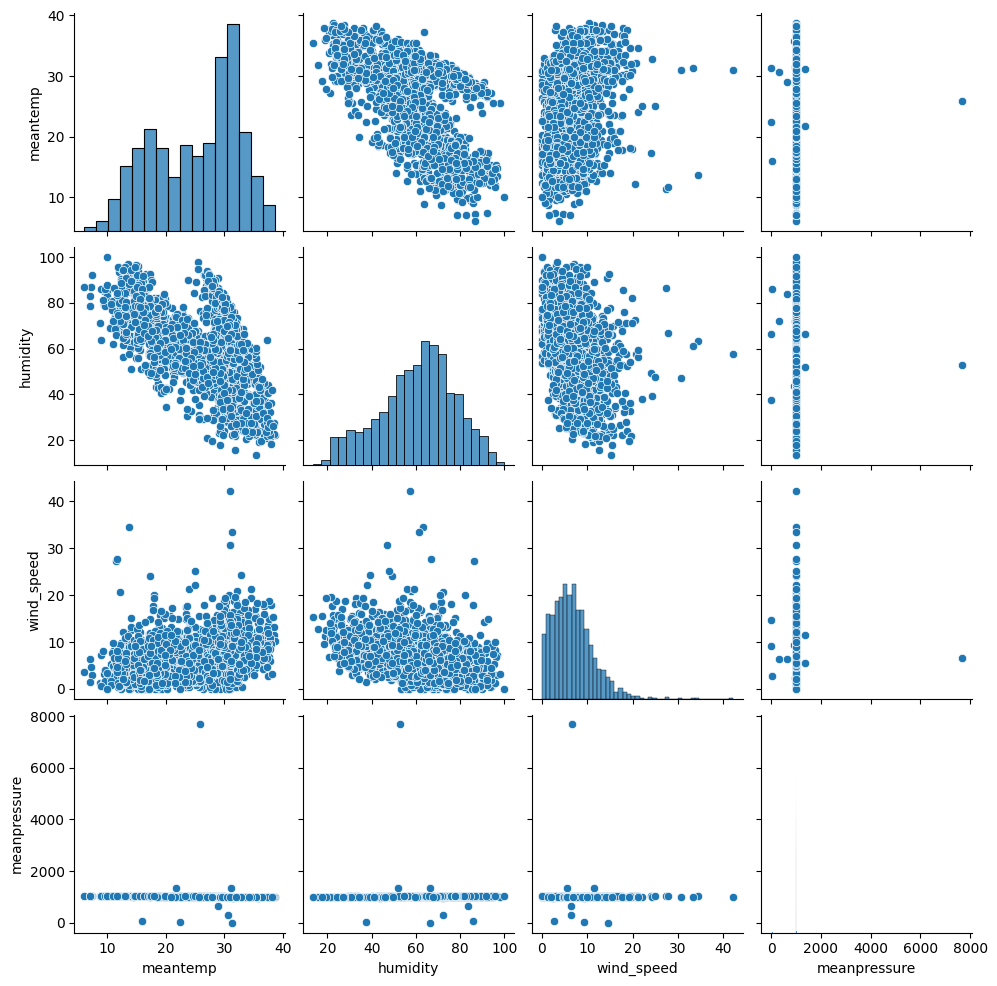

In [ ]:
# Plotting each features against each other.
sns.pairplot(data)

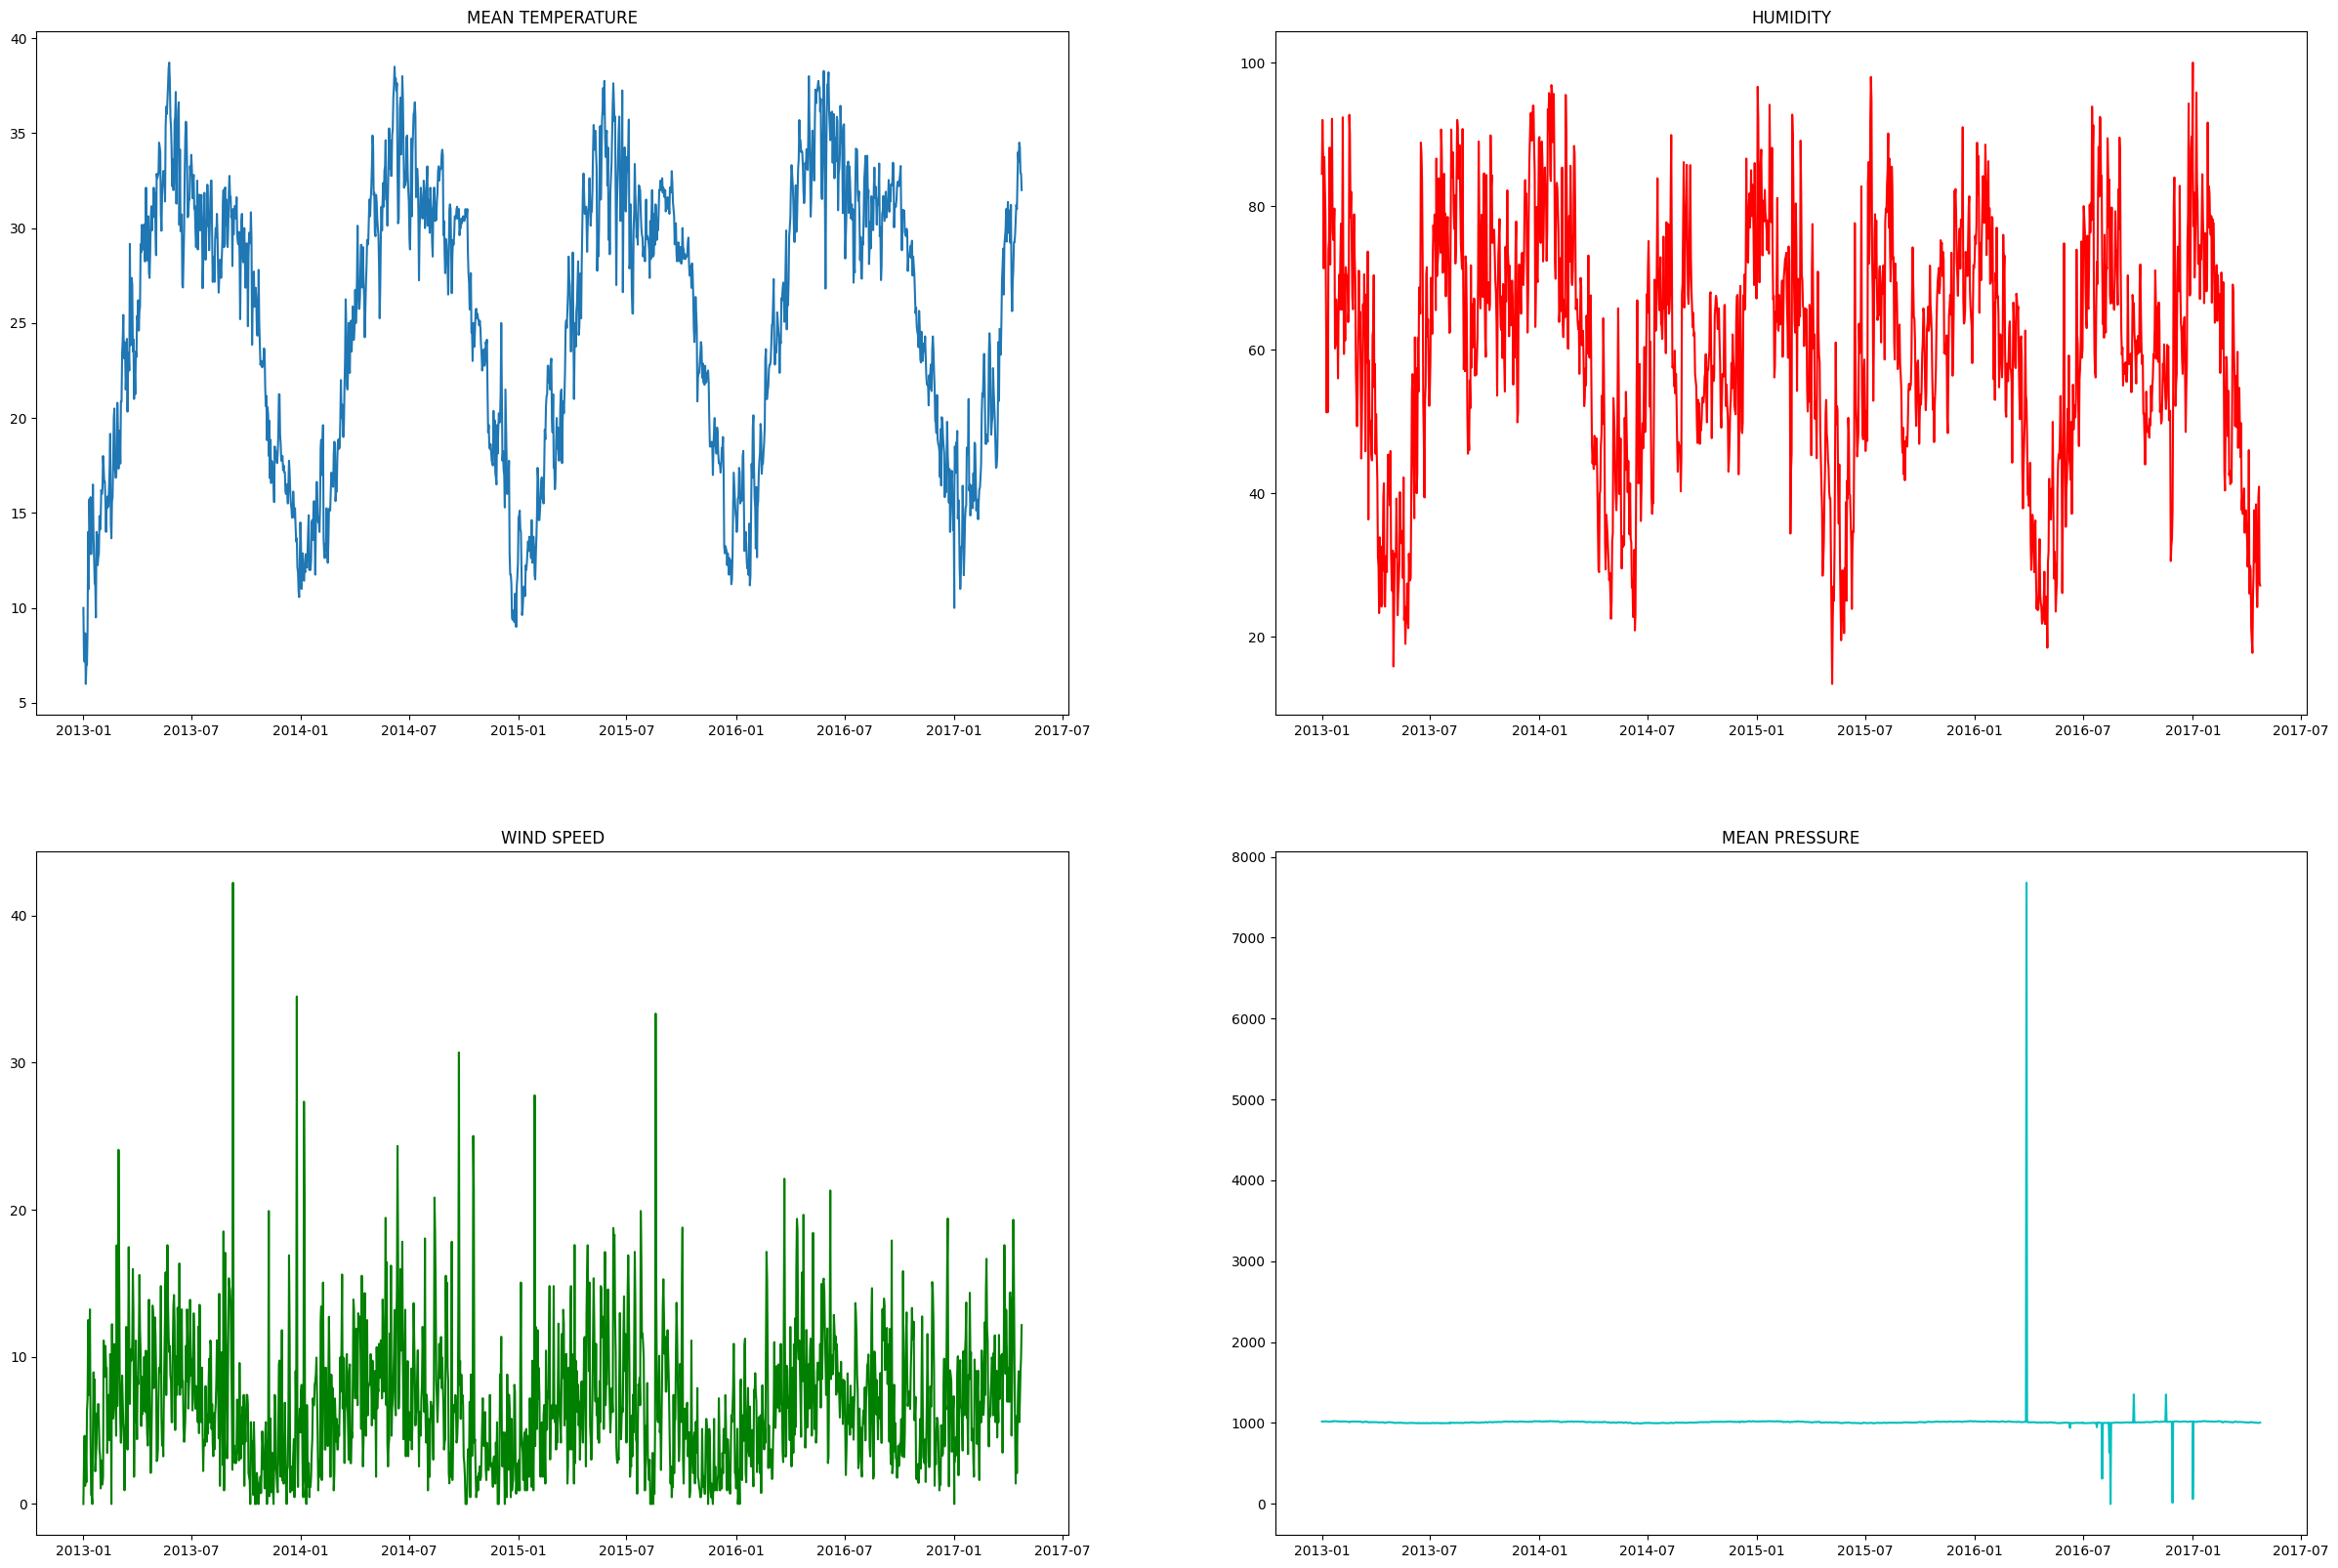

In [ ]:
#Time series Graph of MEAN TEMPERATURE, HUMIDITY, WIND SPEED, MEAN PRESSURE
plt.figure(figsize=(30,20))
plt.subplot(2, 2, 1)
plt.plot(data['meantemp'])
plt.title("MEAN TEMPERATURE")

plt.subplot(2, 2, 2)
plt.plot(data['humidity'],'r')
plt.title("HUMIDITY")

plt.subplot(2, 2, 3)
plt.plot(data['wind_speed'],'g')
plt.title("WIND SPEED")

plt.subplot(2, 2, 4)
plt.plot(data['meanpressure'],'c')
plt.title("MEAN PRESSURE")

plt.show()

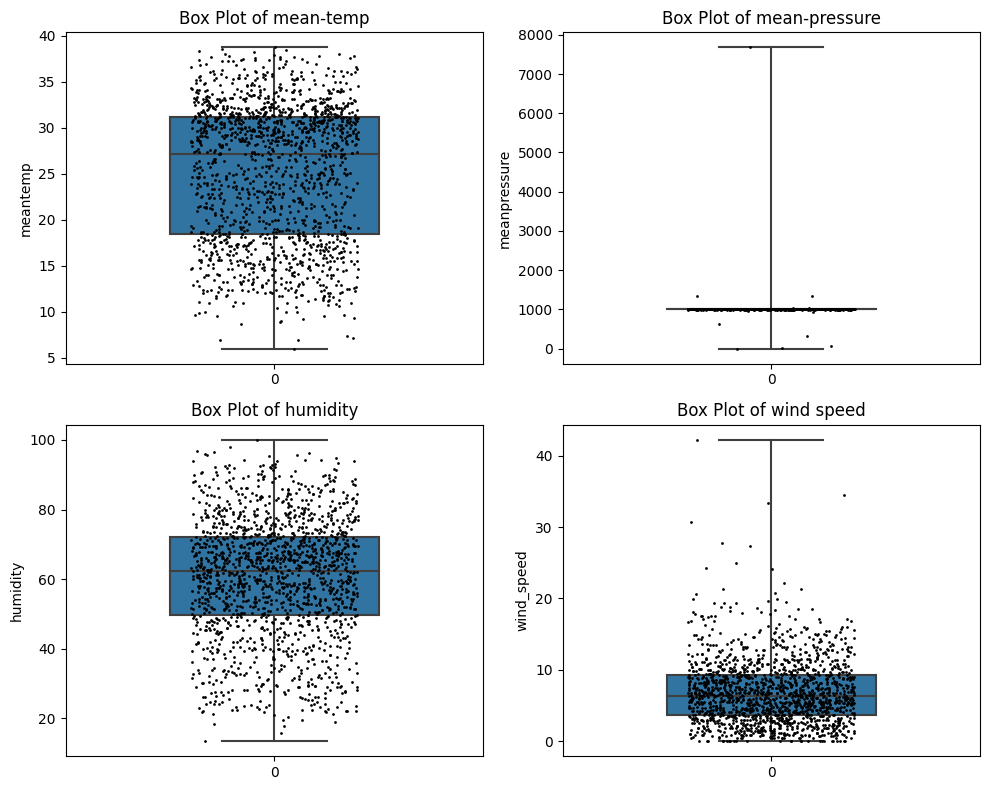

In [ ]:
# Boxplots of each features to analyze outliers and anomalies
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot for 'meantemp'
sns.boxplot(data=data['meantemp'], ax=axes[0, 0], whis=[0, 100], width=0.5)
sns.stripplot(data=data['meantemp'], ax=axes[0, 0], color='black', jitter=0.2, size=2)
axes[0, 0].set_title('Box Plot of mean-temp')

# Plot for 'meanpressure'
sns.boxplot(data=data['meanpressure'], ax=axes[0, 1], whis=[0, 100], width=0.5)
sns.stripplot(data=data['meanpressure'], ax=axes[0, 1], color='black', jitter=0.2, size=2)
axes[0, 1].set_title('Box Plot of mean-pressure')

# Plot for 'humidity'
sns.boxplot(data=data['humidity'], ax=axes[1, 0], whis=[0, 100], width=0.5)
sns.stripplot(data=data['humidity'], ax=axes[1, 0], color='black', jitter=0.2, size=2)
axes[1, 0].set_title('Box Plot of humidity')

# Plot for 'wind_speed'
sns.boxplot(data=data['wind_speed'], ax=axes[1, 1], whis=[0, 100], width=0.5)
sns.stripplot(data=data['wind_speed'], ax=axes[1, 1], color='black', jitter=0.2, size=2)
axes[1, 1].set_title('Box Plot of wind speed')

plt.tight_layout()

# Show the plots
plt.show()


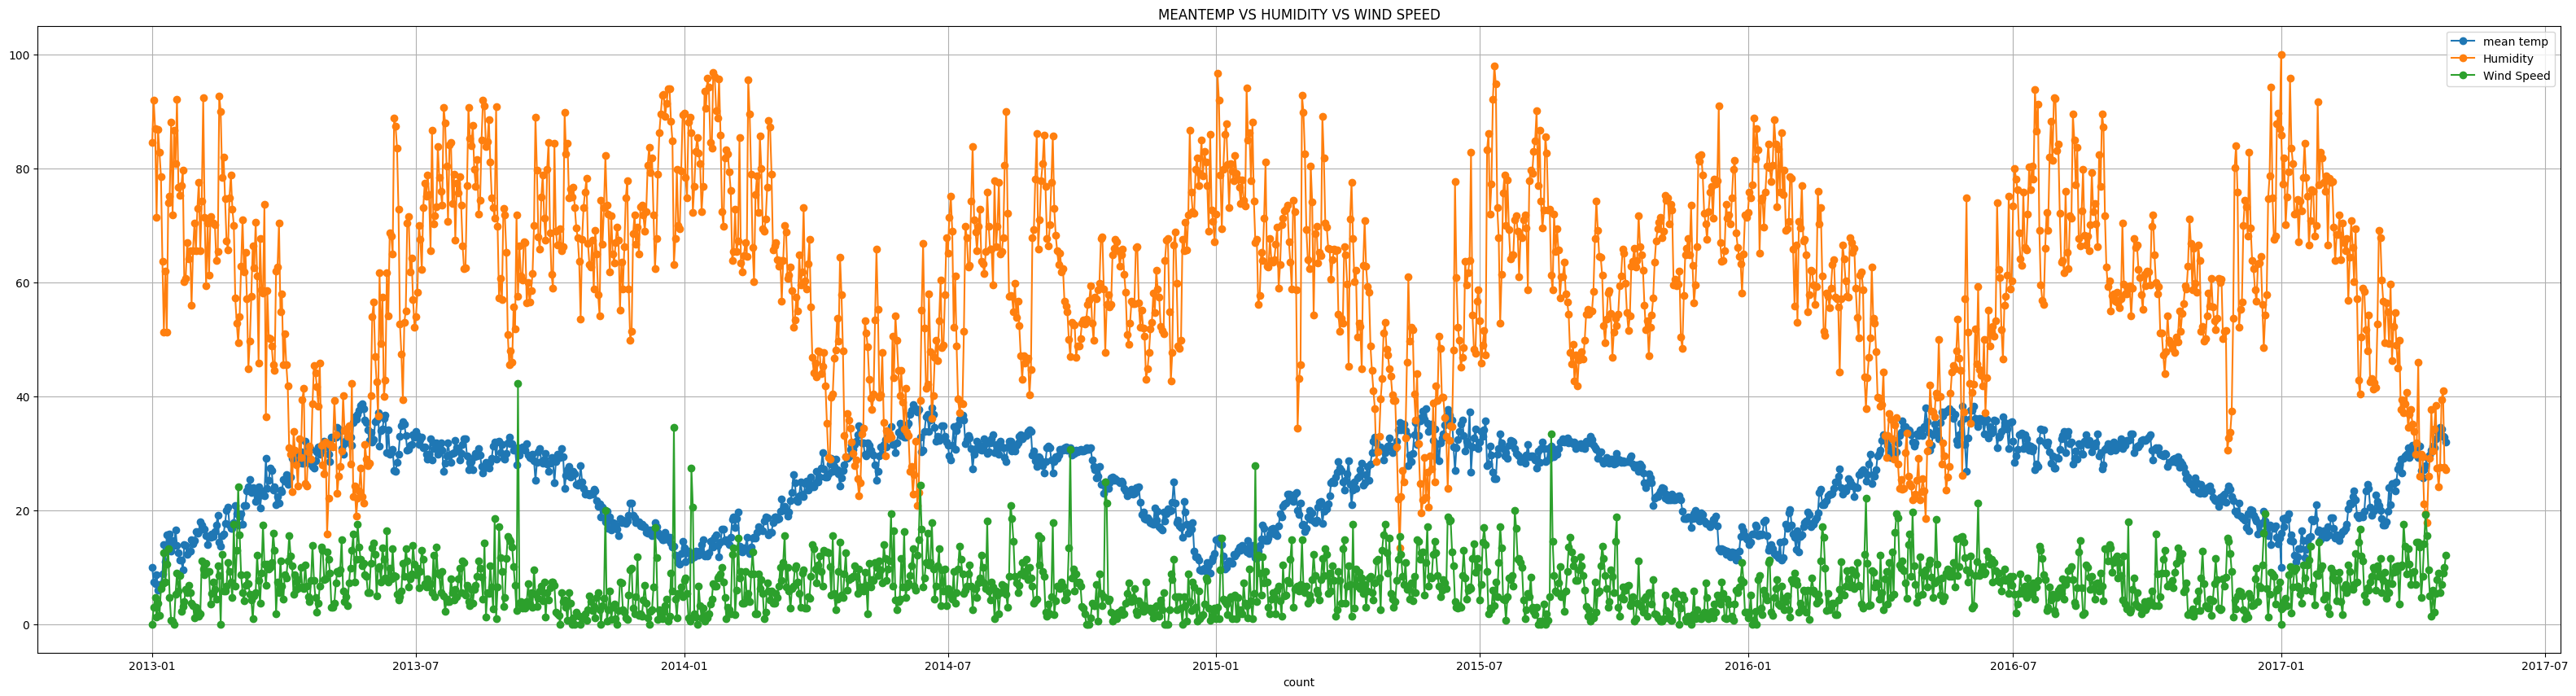

In [ ]:
plt.figure(figsize=(40,10))
plt.plot(data['meantemp'],marker="o",label="mean temp")
plt.plot(data['humidity'],marker="o",label="Humidity")
plt.plot(data['wind_speed'],marker="o",label="Wind Speed")
plt.title("MEANTEMP VS HUMIDITY VS WIND SPEED")
plt.xlabel("count")
plt.grid()
plt.legend()
plt.show()

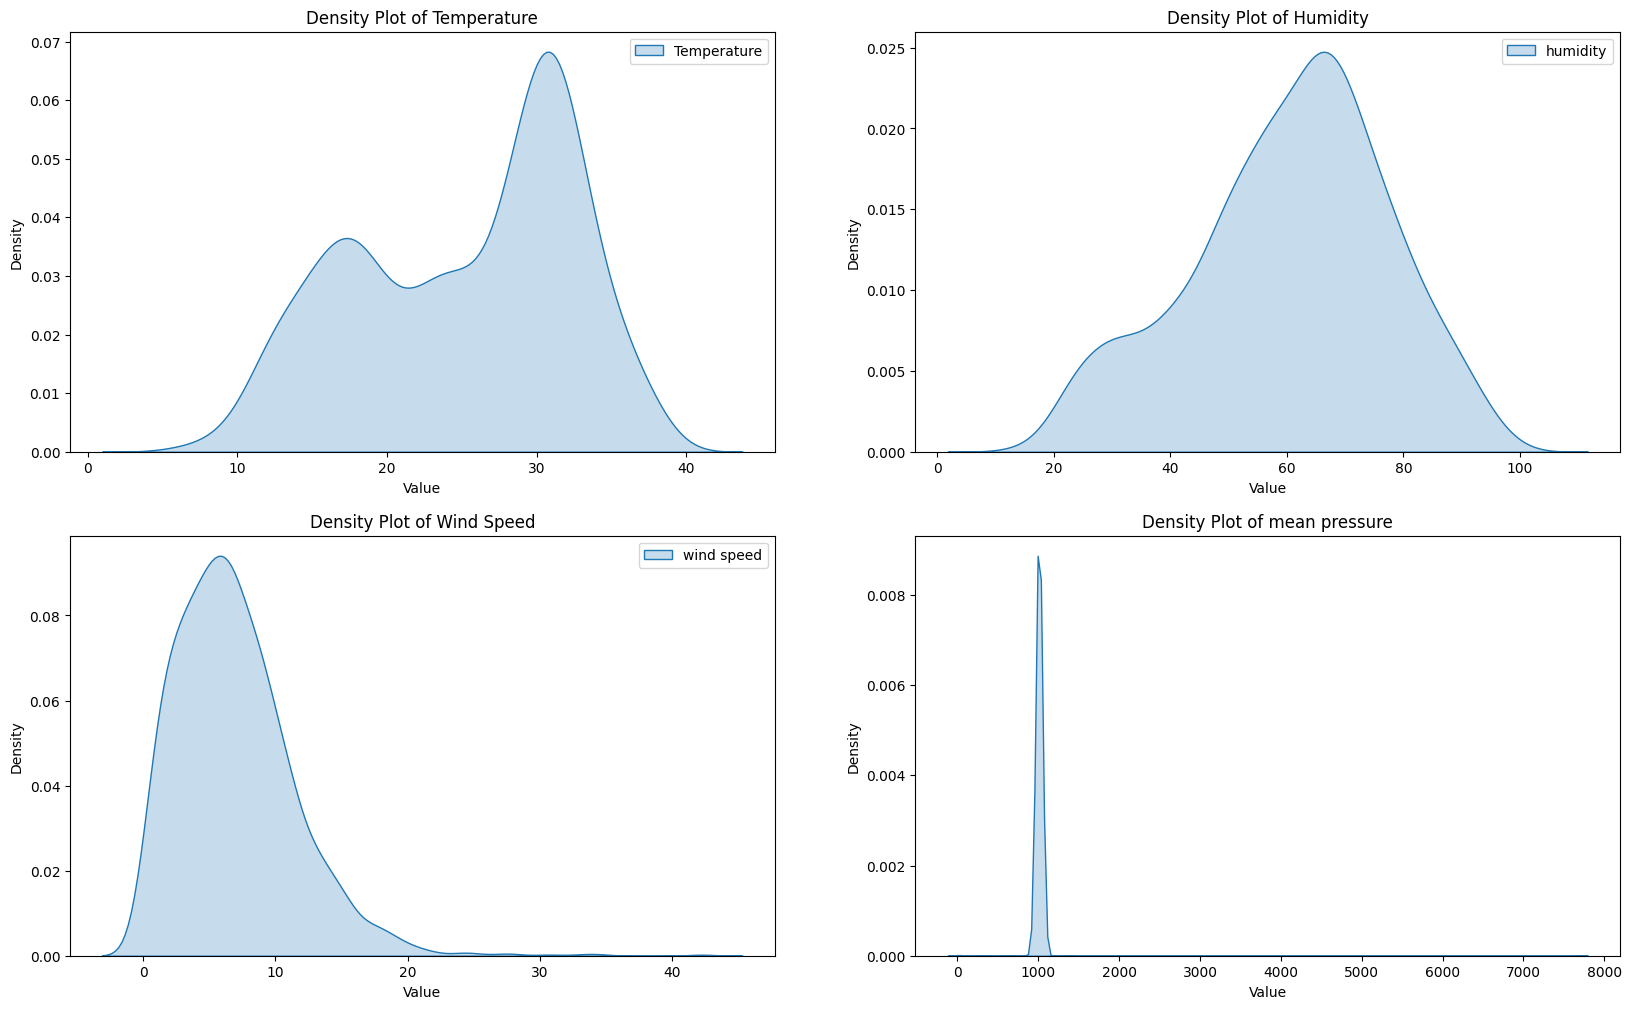

In [ ]:
#density plot
plt.figure(figsize=(20,12))
plt.subplot(2, 2, 1)
sns.kdeplot(data['meantemp'], label='Temperature', fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Temperature')
plt.legend()

plt.subplot(2, 2, 2)
sns.kdeplot(data['humidity'], label='humidity', fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Humidity')

plt.legend()

plt.subplot(2, 2, 3)
sns.kdeplot(data['wind_speed'], label='wind speed', fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of Wind Speed')
plt.legend()
plt.subplot(2, 2, 4)
sns.kdeplot(data['meanpressure'], label='mean pressure', fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density Plot of mean pressure')
plt.show()


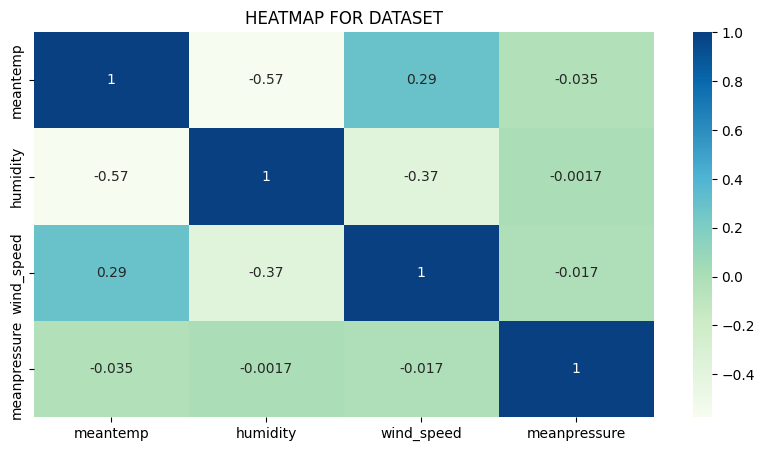

In [ ]:
# Understanding the correlation by heatmap
plt.figure(figsize=(10,5))
plt.title("HEATMAP FOR DATASET")
sns.heatmap(data.corr(),cmap='GnBu',annot=True);
plt.show();
# Conclusion- We can see the negative correlation between temp and humidity i.e. if one increseas other decreases and vice versa.

Let's explore the relationship between temperature and humidity in more detail.

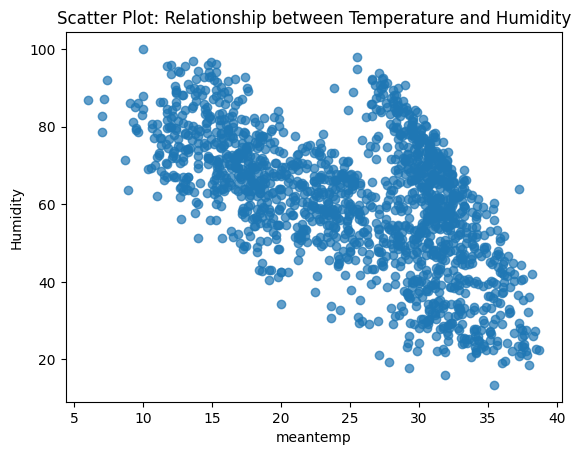

In [ ]:
meantemp = data['meantemp']
humidity = data['humidity']

plt.scatter(meantemp, humidity, alpha=0.7)

plt.xlabel('meantemp')
plt.ylabel('Humidity')
plt.title('Scatter Plot: Relationship between Temperature and Humidity')
plt.show()

In [ ]:
# Plotting temperature and humidity on a graph with standard scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df = scaler.fit_transform(data.values)
new_df = pd.DataFrame(new_df, index=data.index, columns=data.columns)
new_df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.073073,1.417103,-1.530010,0.028960
2013-01-02,-2.427167,1.858940,-0.869152,0.041138
2013-01-03,-2.458944,1.564382,-0.502502,0.046085
2013-01-04,-2.254659,0.641435,-1.256500,0.037523
2013-01-05,-2.617833,1.554564,-0.709482,0.033717


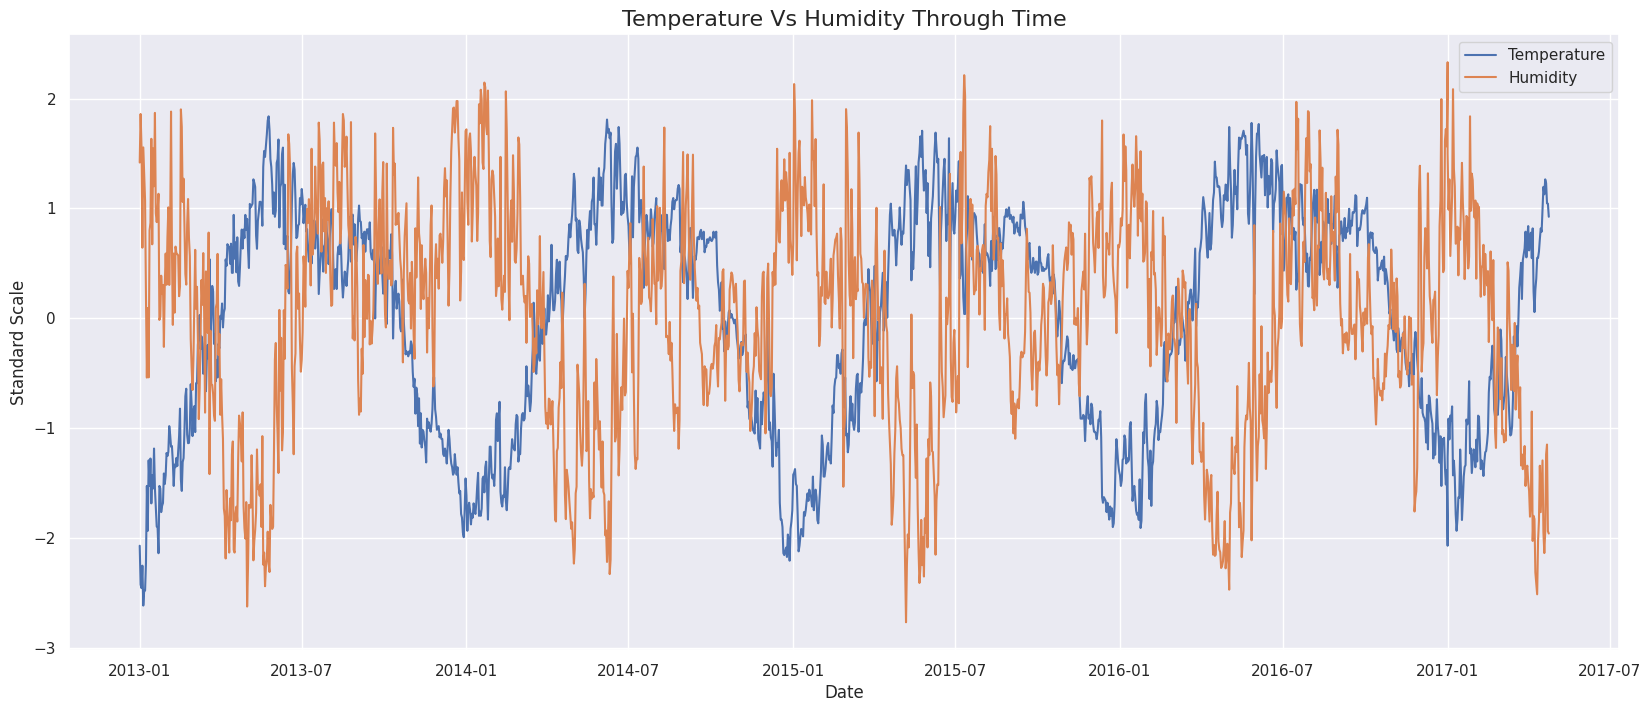

In [ ]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(20,8))
plt.plot(new_df.index, new_df.meantemp, label='Temperature')
plt.plot(new_df.index, new_df.humidity, label = 'Humidity')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Standard Scale')
plt.title('Temperature Vs Humidity Through Time', fontsize=16)
plt.show()